# Net generation and investigation of 2d net-generated cluster 

In [366]:
import numpy as np
import matplotlib.pyplot as plt
from random import random

## Grid generation with and without shell

In [367]:
def generate_filled_grid(n, fill_prob):
    return np.random.choice([0, 1], size=(n, n), p=[1 - fill_prob, fill_prob])

def generate_filled_grid_with_shell(n, node_prob, shell_prob):
    size_with_shells = n * 3
    nodes_index_range = range(1, size_with_shells, 3)

    res = np.zeros(shape=(size_with_shells, size_with_shells), dtype=int)
    
    for i in nodes_index_range:
        for j in nodes_index_range:
            if random() <= node_prob:
                res[i, j] = 1
                if random() <= shell_prob:
                    res[i - 1, j] = 1
                if random() <= shell_prob:
                    res[i, j + 1] = 1
                if random() <= shell_prob:
                    res[i + 1, j] = 1
                if random() <= shell_prob:
                    res[i, j - 1] = 1
    return res

## Depending on filled grid generate clusters map

In [368]:
def fill_marker_grid(arr):
    n = (arr[0].size) // 3

    markers = np.zeros(shape=(n, n))
    last_cluster_marker = 0

    size_with_shells = n * 3
    
    if arr[1, 1] == 1:
        last_cluster_marker += 1
        markers[0, 0] = last_cluster_marker

    for j in range(4, size_with_shells, 3):
        if arr[1, j] == 1:
            i_m = 0
            j_m = int(j // 3)
            if arr[1, j - 1] == 1 and arr[1, j - 2] == 1:
                markers[i_m, j_m] = markers[i_m, j_m - 1] 
            else: 
                last_cluster_marker += 1
                markers[i_m, j_m] = last_cluster_marker
            
    for i in range(4, size_with_shells, 3):
        if arr[i, 1] == 1:
            i_m = int(i // 3)
            j_m = 0
            if arr[i - 1, 1] == 1 and arr[i - 2, 1] == 1:
                markers[i_m, j_m] = markers[i_m - 1, 0]
            else:
                last_cluster_marker += 1
                markers[i_m, j_m] = last_cluster_marker

        for j in range(4, size_with_shells, 3):
            if arr[i, j] == 1:
                i_m = int(i // 3)
                j_m = int(j // 3)
                if arr[i - 1, j] == arr[i - 2, j] == arr[i, j - 1] == arr[i, j - 2] == 1:
                    new_m = markers[i_m - 1, j_m]
                    markers[i_m, j_m] = markers[i_m - 1, j_m]
                    markers = np.where(markers == markers[i_m, j_m - 1],  new_m, markers[i_m, j_m])
                elif arr[i - 1, j] == arr[i - 2, j] == 1:
                    markers[i_m, j_m] = markers[i_m - 1, j_m]
                elif arr[i, j - 1] == arr[i, j - 2] == 1:
                    markers[i_m, j_m] = markers[i_m, j_m - 1]
                else:
                    last_cluster_marker += 1
                    markers[i_m, j_m] = last_cluster_marker
    
    return markers

## Additional functions

In [369]:
def display_array(arr, figure, vmin=None, vmax=None):
    plt.figure(figure)
    plt.imshow(arr, vmin=None, vmax=None, cmap='binary')

## Demonstration

### Without shell

In [376]:
filled_grid = generate_filled_grid(3, 0.5)
print(filled_grid)

[[1 1 1]
 [0 1 0]
 [0 0 0]]


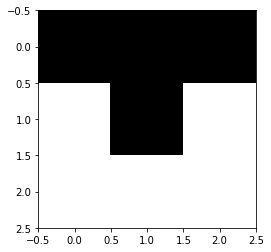

In [377]:
display_array(filled_grid, "init")

### With shell

In [379]:
filled_grid_with_shell = generate_filled_grid_with_shell(n=3, node_prob=0.5, shell_prob=0.5)
marker_grid = fill_marker_grid(filled_grid_with_shell)
print(filled_grid_with_shell)
print(marker_grid)

[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 1 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 1 1 0 0 1 1]
 [0 0 0 0 0 0 0 1 0]]
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 2. 3.]]


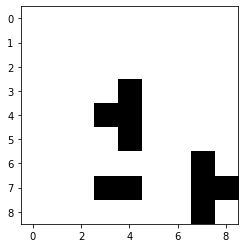

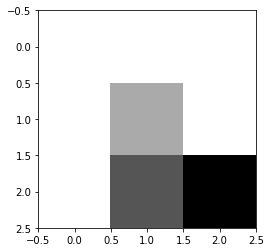

In [380]:
display_array(filled_grid_with_shell, "with_shell")
display_array(marker_grid, "markers")